## **Problem Statement: Building Stock Portfolios**

**Goal :** Creating pools of stocks that move together(similar characteristics) on one or more fundamental financial metric.

In [1]:
  import pandas as pd
  import numpy as np
  from matplotlib import pyplot as plt
  plt.rcParams["figure.figsize"] = (18,10)
  import seaborn as sns

In [2]:
!wget "https://drive.google.com/uc?export=download&id=1giO5bbp3l0INVvTQIGJ7s_Ai5_TWNuIb" -O ind_nifty50list.csv

--2025-11-25 13:03:52--  https://drive.google.com/uc?export=download&id=1giO5bbp3l0INVvTQIGJ7s_Ai5_TWNuIb
Resolving drive.google.com (drive.google.com)... 64.233.189.113, 64.233.189.100, 64.233.189.139, ...
Connecting to drive.google.com (drive.google.com)|64.233.189.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1giO5bbp3l0INVvTQIGJ7s_Ai5_TWNuIb&export=download [following]
--2025-11-25 13:03:53--  https://drive.usercontent.google.com/download?id=1giO5bbp3l0INVvTQIGJ7s_Ai5_TWNuIb&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.157.132, 2404:6800:4008:c13::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.157.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3053 (3.0K) [application/octet-stream]
Saving to: ‘ind_nifty50list.csv’

ind_nifty50list.csv 100%[===================>]   2.98K  --.-

**Installing yfinance**


- **yfinance** is a library that helps us download market data from yahoo finance's api.

- So lets install these libraries into our environment using pip.

- You can read more about it <a href="https://pypi.org/project/yfinance/"> here </a>

In [3]:
!pip install yfinance

In [4]:
# Since yfinance is an old library, it also has some glitches, so we install this library as a fix
!pip install fix-yahoo-finance

  Preparing metadata (setup.py) ... done
  Created wheel for fix-yahoo-finance: filename=fix_yahoo_finance-0.1.37-py3-none-any.whl size=7071 sha256=da29cfe7ea41fc0e210031bcd89275e250e2f8d392c53773c40f1937685a00f3
  Stored in directory: /root/.cache/pip/wheels/4c/02/20/d4df28d881ed255afd7a5563b0ea16b12d39ff1c2b8fc0c32e
Successfully built fix-yahoo-finance


#### EDA
#### **Importing Data**

- Purpose of this dataset: Getting list of Company names which are stored in the 'Symbol' column of the data

In [5]:
stocks_df = pd.read_csv("./ind_nifty50list.csv")
list_of_symbols = list(stocks_df['Symbol'])
stocks_df.head()

,Company Name,Industry,Symbol,Series,ISIN Code
0,Adani Ports and Special Economic Zone Ltd.,SERVICES,ADANIPORTS,EQ,INE742F01042
1,Asian Paints Ltd.,CONSUMER GOODS,ASIANPAINT,EQ,INE021A01026
2,Axis Bank Ltd.,FINANCIAL SERVICES,AXISBANK,EQ,INE238A01034
3,Bajaj Auto Ltd.,AUTOMOBILE,BAJAJ-AUTO,EQ,INE917I01010
4,Bajaj Finance Ltd.,FINANCIAL SERVICES,BAJFINANCE,EQ,INE296A01024


**Now, we'll take symbols from original dataset**
- We'll add `.NS` at the end of every symbol to fetch data from Yahoo Finance based on company's symbol.

In [6]:
yf_symbols = list(map(lambda x: x + '.NS', list_of_symbols))
yf_symbols

['ADANIPORTS.NS',
 'ASIANPAINT.NS',
 'AXISBANK.NS',
 'BAJAJ-AUTO.NS',
 'BAJFINANCE.NS',
 'BAJAJFINSV.NS',
 'BPCL.NS',
 'BHARTIARTL.NS',
 'BRITANNIA.NS',
 'CIPLA.NS',
 'COALINDIA.NS',
 'DIVISLAB.NS',
 'DRREDDY.NS',
 'EICHERMOT.NS',
 'GRASIM.NS',
 'HCLTECH.NS',
 'HDFCBANK.NS',
 'HDFCLIFE.NS',
 'HEROMOTOCO.NS',
 'HINDALCO.NS',
 'HINDUNILVR.NS',
 'HDFC.NS',
 'ICICIBANK.NS',
 'ITC.NS',
 'IOC.NS',
 'INDUSINDBK.NS',
 'INFY.NS',
 'JSWSTEEL.NS',
 'KOTAKBANK.NS',
 'LT.NS',
 'M&M.NS',
 'MARUTI.NS',
 'NTPC.NS',
 'NESTLEIND.NS',
 'ONGC.NS',
 'POWERGRID.NS',
 'RELIANCE.NS',
 'SBILIFE.NS',
 'SHREECEM.NS',
 'SBIN.NS',
 'SUNPHARMA.NS',
 'TCS.NS',
 'TATACONSUM.NS',
 'TATAMOTORS.NS',
 'TATASTEEL.NS',
 'TECHM.NS',
 'TITAN.NS',
 'UPL.NS',
 'ULTRACEMCO.NS',
 'WIPRO.NS']

**Now, we'll define some variables and fetch the corresponding data from Yahoo Finance for the companies in our list**

In [7]:
import yfinance as yf
import numpy as np


stock_financials = {
    'marketCap': [],
    'regularMarketVolume': [],
    'earningsQuarterlyGrowth': [],
    'bookValue': [],
    'totalRevenue': [],
    'returnOnAssets': [],
    'profitMargins': [],
    'earningsGrowth': []
    }

for ticker in yf_symbols:
    stock_info = yf.Ticker(ticker).info
    stock_financials['marketCap'].append(stock_info.get('marketCap', np.nan))
    stock_financials['regularMarketVolume'].append(stock_info.get('regularMarketVolume', np.nan))
    stock_financials['earningsQuarterlyGrowth'].append(stock_info.get('earningsQuarterlyGrowth', np.nan))
    stock_financials['bookValue'].append(stock_info.get('bookValue', np.nan))
    stock_financials['totalRevenue'].append(stock_info.get('totalRevenue', np.nan))
    stock_financials['returnOnAssets'].append(stock_info.get('returnOnAssets', np.nan))
    stock_financials['profitMargins'].append(stock_info.get('profitMargins', np.nan))
    stock_financials['earningsGrowth'].append(stock_info.get('earningsGrowth', np.nan))

In [8]:
df = pd.DataFrame(stock_financials)
df.head()

,marketCap,regularMarketVolume,earningsQuarterlyGrowth,bookValue,totalRevenue,returnOnAssets,profitMargins,earningsGrowth
0,3.205659e+12,1355033.0,0.272,310.464,3.474559e+11,0.07341,0.34416,0.271
1,2.756855e+12,972353.0,0.430,204.340,3.433195e+11,0.10356,0.11348,0.431
2,3.930190e+12,5290038.0,-0.253,643.264,7.577806e+11,0.01592,0.34296,-0.255
3,2.526403e+12,482116.0,0.532,1223.784,5.589976e+11,0.14689,0.14902,0.527
4,6.129366e+12,6376412.0,0.219,166.188,4.063930e+11,0.03990,0.45033,0.214


In [9]:
df.shape

(50, 8)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   marketCap                49 non-null     float64
 1   regularMarketVolume      49 non-null     float64
 2   earningsQuarterlyGrowth  46 non-null     float64
 3   bookValue                49 non-null     float64
 4   totalRevenue             49 non-null     float64
 5   returnOnAssets           48 non-null     float64
 6   profitMargins            49 non-null     float64
 7   earningsGrowth           45 non-null     float64
dtypes: float64(8)
memory usage: 3.3 KB


**Downloading stock price data**
- Purpose of this data: Getting returns of the stocks

In [14]:
import yfinance as yf

# Remove the delisted symbol
clean_symbols = [s for s in list_of_symbols if s != "HDFC"]
yf_symbols = [s + ".NS" for s in clean_symbols]

# Download data
stock_prices = yf.download(yf_symbols, start='2020-01-01',auto_adjust=False)['Adj Close']

print(stock_prices.shape)
print(stock_prices.columns)

# Rename columns to the clean names
stock_prices.columns = clean_symbols
stock_prices.head()

[*********************100%***********************]  49 of 49 completed

(1463, 49)
Index(['ADANIPORTS.NS', 'ASIANPAINT.NS', 'AXISBANK.NS', 'BAJAJ-AUTO.NS',
       'BAJAJFINSV.NS', 'BAJFINANCE.NS', 'BHARTIARTL.NS', 'BPCL.NS',
       'BRITANNIA.NS', 'CIPLA.NS', 'COALINDIA.NS', 'DIVISLAB.NS', 'DRREDDY.NS',
       'EICHERMOT.NS', 'GRASIM.NS', 'HCLTECH.NS', 'HDFCBANK.NS', 'HDFCLIFE.NS',
       'HEROMOTOCO.NS', 'HINDALCO.NS', 'HINDUNILVR.NS', 'ICICIBANK.NS',
       'INDUSINDBK.NS', 'INFY.NS', 'IOC.NS', 'ITC.NS', 'JSWSTEEL.NS',
       'KOTAKBANK.NS', 'LT.NS', 'M&M.NS', 'MARUTI.NS', 'NESTLEIND.NS',
       'NTPC.NS', 'ONGC.NS', 'POWERGRID.NS', 'RELIANCE.NS', 'SBILIFE.NS',
       'SBIN.NS', 'SHREECEM.NS', 'SUNPHARMA.NS', 'TATACONSUM.NS',
       'TATAMOTORS.NS', 'TATASTEEL.NS', 'TCS.NS', 'TECHM.NS', 'TITAN.NS',
       'ULTRACEMCO.NS', 'UPL.NS', 'WIPRO.NS'],
      dtype='object', name='Ticker')


,ADANIPORTS,ASIANPAINT,AXISBANK,BAJAJ-AUTO,BAJFINANCE,BAJAJFINSV,BPCL,BHARTIARTL,BRITANNIA,CIPLA,...,SUNPHARMA,TCS,TATACONSUM,TATAMOTORS,TATASTEEL,TECHM,TITAN,UPL,ULTRACEMCO,WIPRO
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,362.584290,1705.415161,745.586853,2636.314697,935.215027,413.532166,433.316467,162.097198,2715.622314,453.636536,...,408.711792,309.309662,181.187698,39.250175,1900.037720,602.617493,1132.704834,3942.765381,552.377441,116.644867
2020-01-02,367.864838,1702.990356,753.802673,2611.960449,947.894287,414.973724,435.132690,160.745422,2727.906250,451.348816,...,409.323486,308.832123,190.323227,40.685078,1891.316040,605.740906,1133.538452,4117.159180,559.138367,116.927422
2020-01-03,367.240814,1665.661499,739.860840,2570.994385,931.964233,409.833038,435.037109,159.410141,2714.862793,447.964905,...,418.404938,303.913361,187.720093,40.588585,1929.008301,612.897034,1117.941895,4092.329102,554.724976,118.245979
2020-01-06,365.032532,1623.578003,720.242737,2542.205078,901.734192,390.604309,429.827362,154.678940,2699.898438,444.914581,...,414.028870,298.087250,182.366486,39.711697,1928.832764,609.180664,1136.481323,4032.095947,549.278687,118.740417
2020-01-07,369.449036,1639.983398,722.732300,2542.456055,907.014282,391.674500,425.477966,151.991867,2712.897705,446.678070,...,420.098907,300.761505,181.433289,39.950844,1933.566284,614.478516,1137.805420,4114.540039,558.762695,120.176720


In [15]:
# splitting data by year - 2020 returns
price_2020 = stock_prices.loc["2020-01-02 00:00:00":"2020-12-31 00:00:00"]

# to see % growth of the stock: ((endDate/startDate) - 1) * 100
stock_prices.loc['returns_2020'] = (price_2020.loc['2020-08-04 00:00:00'] / price_2020.loc['2020-01-02 00:00:00'] - 1)*100

stock_prices

,ADANIPORTS,ASIANPAINT,AXISBANK,BAJAJ-AUTO,BAJFINANCE,BAJAJFINSV,BPCL,BHARTIARTL,BRITANNIA,CIPLA,...,SUNPHARMA,TCS,TATACONSUM,TATAMOTORS,TATASTEEL,TECHM,TITAN,UPL,ULTRACEMCO,WIPRO
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,362.584290,1705.415161,745.586853,2636.314697,935.215027,413.532166,433.316467,162.097198,2715.622314,453.636536,...,408.711792,309.309662,181.187698,39.250175,1900.037720,602.617493,1132.704834,3942.765381,552.377441,116.644867
2020-01-02 00:00:00,367.864838,1702.990356,753.802673,2611.960449,947.894287,414.973724,435.132690,160.745422,2727.906250,451.348816,...,409.323486,308.832123,190.323227,40.685078,1891.316040,605.740906,1133.538452,4117.159180,559.138367,116.927422
2020-01-03 00:00:00,367.240814,1665.661499,739.860840,2570.994385,931.964233,409.833038,435.037109,159.410141,2714.862793,447.964905,...,418.404938,303.913361,187.720093,40.588585,1929.008301,612.897034,1117.941895,4092.329102,554.724976,118.245979
2020-01-06 00:00:00,365.032532,1623.578003,720.242737,2542.205078,901.734192,390.604309,429.827362,154.678940,2699.898438,444.914581,...,414.028870,298.087250,182.366486,39.711697,1928.832764,609.180664,1136.481323,4032.095947,549.278687,118.740417
2020-01-07 00:00:00,369.449036,1639.983398,722.732300,2542.456055,907.014282,391.674500,425.477966,151.991867,2712.897705,446.678070,...,420.098907,300.761505,181.433289,39.950844,1933.566284,614.478516,1137.805420,4114.540039,558.762695,120.176720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-11-20 00:00:00,1491.099976,2859.800049,1285.199951,8979.500000,2095.600098,1028.599976,2158.300049,365.049988,5819.000000,1529.199951,...,1777.400024,1173.900024,359.799988,172.460007,3144.800049,1456.000000,3902.399902,11753.000000,753.500000,246.259995
2025-11-21 00:00:00,1479.800049,2876.600098,1275.800049,8892.000000,2052.399902,1004.099976,2162.699951,364.549988,5813.000000,1511.800049,...,1779.699951,1183.099976,362.250000,168.000000,3150.600098,1461.500000,3904.199951,11729.000000,750.849976,244.490005
2025-11-24 00:00:00,1485.900024,2879.199951,1269.000000,9007.500000,2030.800049,994.000000,2152.100098,359.649994,5815.500000,1504.000000,...,1780.800049,1186.000000,358.299988,165.360001,3141.199951,1494.699951,3874.300049,11584.000000,742.700012,247.270004


In [16]:
stock_prices = stock_prices.transpose()
stock_prices.head()

Date,2020-01-01 00:00:00,2020-01-02 00:00:00,2020-01-03 00:00:00,2020-01-06 00:00:00,2020-01-07 00:00:00,2020-01-08 00:00:00,2020-01-09 00:00:00,2020-01-10 00:00:00,2020-01-13 00:00:00,2020-01-14 00:00:00,...,2025-11-13 00:00:00,2025-11-14 00:00:00,2025-11-17 00:00:00,2025-11-18 00:00:00,2025-11-19 00:00:00,2025-11-20 00:00:00,2025-11-21 00:00:00,2025-11-24 00:00:00,2025-11-25 00:00:00,returns_2020
ADANIPORTS,362.584290,367.864838,367.240814,365.032532,369.449036,370.265106,376.169769,376.409821,374.777618,373.673492,...,1499.000000,1512.699951,1507.599976,1495.000000,1484.199951,1491.099976,1479.800049,1485.900024,1483.900024,-16.891373
ASIANPAINT,1705.415161,1702.990356,1665.661499,1623.578003,1639.983398,1644.168091,1685.776245,1704.797363,1716.542847,1730.095337,...,2874.913086,2901.871094,2883.399902,2906.000000,2893.699951,2859.800049,2876.600098,2879.199951,2875.800049,-3.813712
AXISBANK,745.586853,753.802673,739.860840,720.242737,722.732300,721.487549,739.761230,736.972839,734.333984,744.790161,...,1225.199951,1241.599976,1249.599976,1265.400024,1270.400024,1285.199951,1275.800049,1269.000000,1266.300049,-43.305379
BAJAJ-AUTO,2636.314697,2611.960449,2570.994385,2542.205078,2542.456055,2560.281738,2582.417725,2595.390137,2589.406006,2595.724609,...,8867.500000,8843.000000,8945.500000,8921.000000,8884.500000,8979.500000,8892.000000,9007.500000,9048.000000,-0.566458
BAJFINANCE,935.215027,947.894287,931.964233,901.734192,907.014282,911.985352,936.890320,934.596680,942.873474,952.805481,...,2056.199951,2065.800049,2079.600098,2050.199951,2050.199951,2095.600098,2052.399902,2030.800049,2030.199951,-35.138664


**Putting the data together**

In [17]:
prices = stock_prices.iloc[:, -1]

# Align df's index with the stock names from the original list_of_symbols
# df was created from stock_financials in the order of yf_symbols, which is derived from list_of_symbols.
# Temporarily add symbols to df as a column to set the index.
df['Symbol'] = list_of_symbols
df = df.set_index('Symbol')
df.index.name = None # Remove index name for cleaner output

# Now df has 50 rows indexed by the original symbols. Filter df to only include
# the symbols present in stock_prices (which are the clean_symbols).
df = df.loc[stock_prices.index]

# Now df has 49 rows, indexed by clean_symbols, matching the 'prices' Series.
# So we can safely assign the 'return_2020' column.
df['return_2020'] = prices
df.head()

,marketCap,regularMarketVolume,earningsQuarterlyGrowth,bookValue,totalRevenue,returnOnAssets,profitMargins,earningsGrowth,return_2020
ADANIPORTS,3.205659e+12,1355033.0,0.272,310.464,3.474559e+11,0.07341,0.34416,0.271,-16.891373
ASIANPAINT,2.756855e+12,972353.0,0.430,204.340,3.433195e+11,0.10356,0.11348,0.431,-3.813712
AXISBANK,3.930190e+12,5290038.0,-0.253,643.264,7.577806e+11,0.01592,0.34296,-0.255,-43.305379
BAJAJ-AUTO,2.526403e+12,482116.0,0.532,1223.784,5.589976e+11,0.14689,0.14902,0.527,-0.566458
BAJFINANCE,6.129366e+12,6376412.0,0.219,166.188,4.063930e+11,0.03990,0.45033,0.214,-35.138664


**Checking for null values**

In [18]:
df.isna().sum()

,0
marketCap,0
regularMarketVolume,0
earningsQuarterlyGrowth,3
bookValue,0
totalRevenue,0
returnOnAssets,1
profitMargins,0
earningsGrowth,4
return_2020,0


In [19]:
df['returnOnAssets'] = df['returnOnAssets'].replace(np.nan, 0)

In [20]:
df.dropna(axis=0, inplace=True)
df.shape

(45, 9)

In [21]:
df.head()

,marketCap,regularMarketVolume,earningsQuarterlyGrowth,bookValue,totalRevenue,returnOnAssets,profitMargins,earningsGrowth,return_2020
ADANIPORTS,3.205659e+12,1355033.0,0.272,310.464,3.474559e+11,0.07341,0.34416,0.271,-16.891373
ASIANPAINT,2.756855e+12,972353.0,0.430,204.340,3.433195e+11,0.10356,0.11348,0.431,-3.813712
AXISBANK,3.930190e+12,5290038.0,-0.253,643.264,7.577806e+11,0.01592,0.34296,-0.255,-43.305379
BAJAJ-AUTO,2.526403e+12,482116.0,0.532,1223.784,5.589976e+11,0.14689,0.14902,0.527,-0.566458
BAJFINANCE,6.129366e+12,6376412.0,0.219,166.188,4.063930e+11,0.03990,0.45033,0.214,-35.138664


**Q. Should we Scale the values?**

- The data seems to be in different scales
- Different financial metrics have different scales.
- We need to put them on the same scale.

We can use `StandardScaler` from `sklearn`

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df)
X = scaler.transform(df)

In [23]:
scaled_df = pd.DataFrame(X, columns=df.columns, index=df.index)

In [24]:
scaled_df

,marketCap,regularMarketVolume,earningsQuarterlyGrowth,bookValue,totalRevenue,returnOnAssets,profitMargins,earningsGrowth,return_2020
ADANIPORTS,-0.275804,-0.574412,-0.099103,-0.308510,-0.606621,-0.067037,1.728519,-0.091945,-0.418891
ASIANPAINT,-0.387240,-0.644915,0.116048,-0.411256,-0.608904,0.489960,-0.412668,0.128797,0.046793
AXISBANK,-0.095905,0.150557,-0.814002,0.013697,-0.380207,-1.129116,1.717380,-0.817634,-1.359470
BAJAJ-AUTO,-0.444460,-0.735234,0.254943,0.575741,-0.489894,1.290445,-0.082784,0.261242,0.162425
BAJFINANCE,0.450142,0.350707,-0.171273,-0.448194,-0.574100,-0.686106,2.713996,-0.170584,-1.068661
BAJAJFINSV,-0.266903,-0.697254,-0.367360,-0.143789,-0.029866,-0.501364,-0.820801,-0.370632,-0.658572
BPCL,-0.688423,-0.067018,1.838616,-0.396252,1.639966,0.024780,-1.020087,1.869898,0.916370
BHARTIARTL,2.197432,0.483269,0.742437,-0.412289,0.275517,-0.025654,0.372316,0.752392,-0.231014
BRITANNIA,-0.720775,-0.767081,-0.154933,-0.459029,-0.696647,2.277151,-0.299149,-0.145751,1.123144
CIPLA,-0.769403,-0.656717,-0.419105,-0.214533,-0.644031,0.480907,0.339922,-0.414780,2.046339


In [34]:
scaled_df.shape

(45, 10)

#### Performing Agglomerative Clustering

In [25]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch

# Refer https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage
Z = sch.linkage(scaled_df, method='ward') #linkage = ward

In [26]:
Z.shape

(44, 4)

Text(0, 0.5, 'distance')

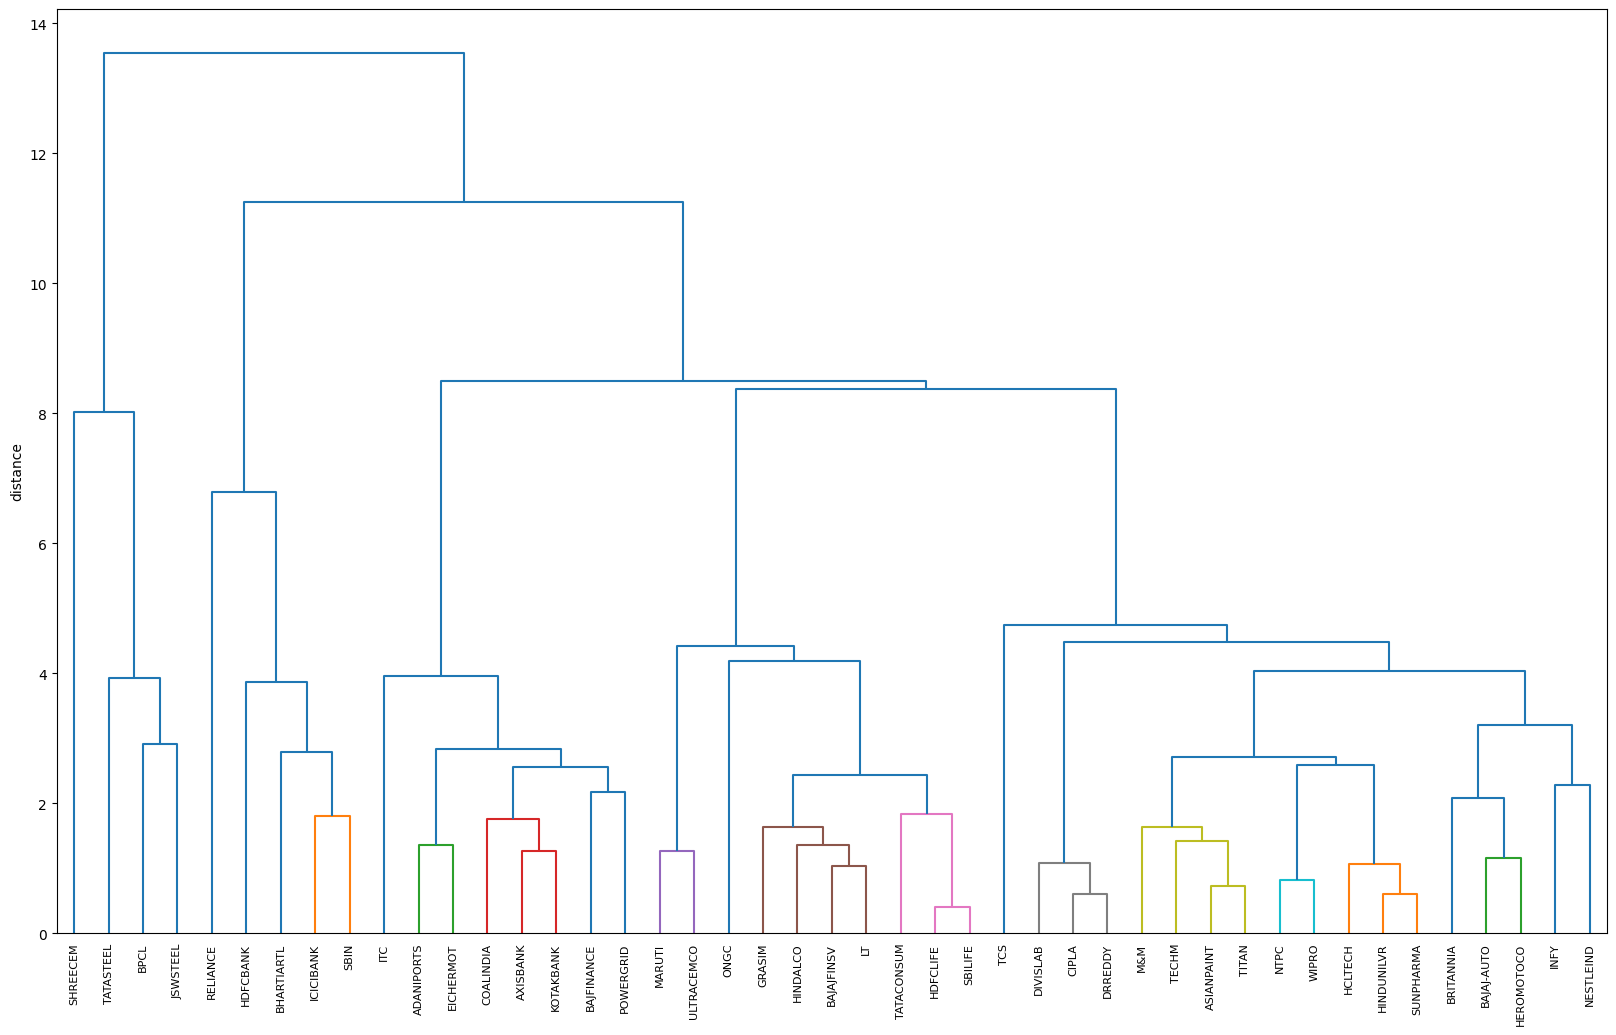

In [27]:
fig, ax = plt.subplots(figsize=(20, 12))
sch.dendrogram(Z, labels=scaled_df.index, ax=ax, color_threshold=2)
plt.xticks(rotation=90)
ax.set_ylabel('distance')

#### **Calculating the number of clusters**

Text(0, 0.5, 'distance')

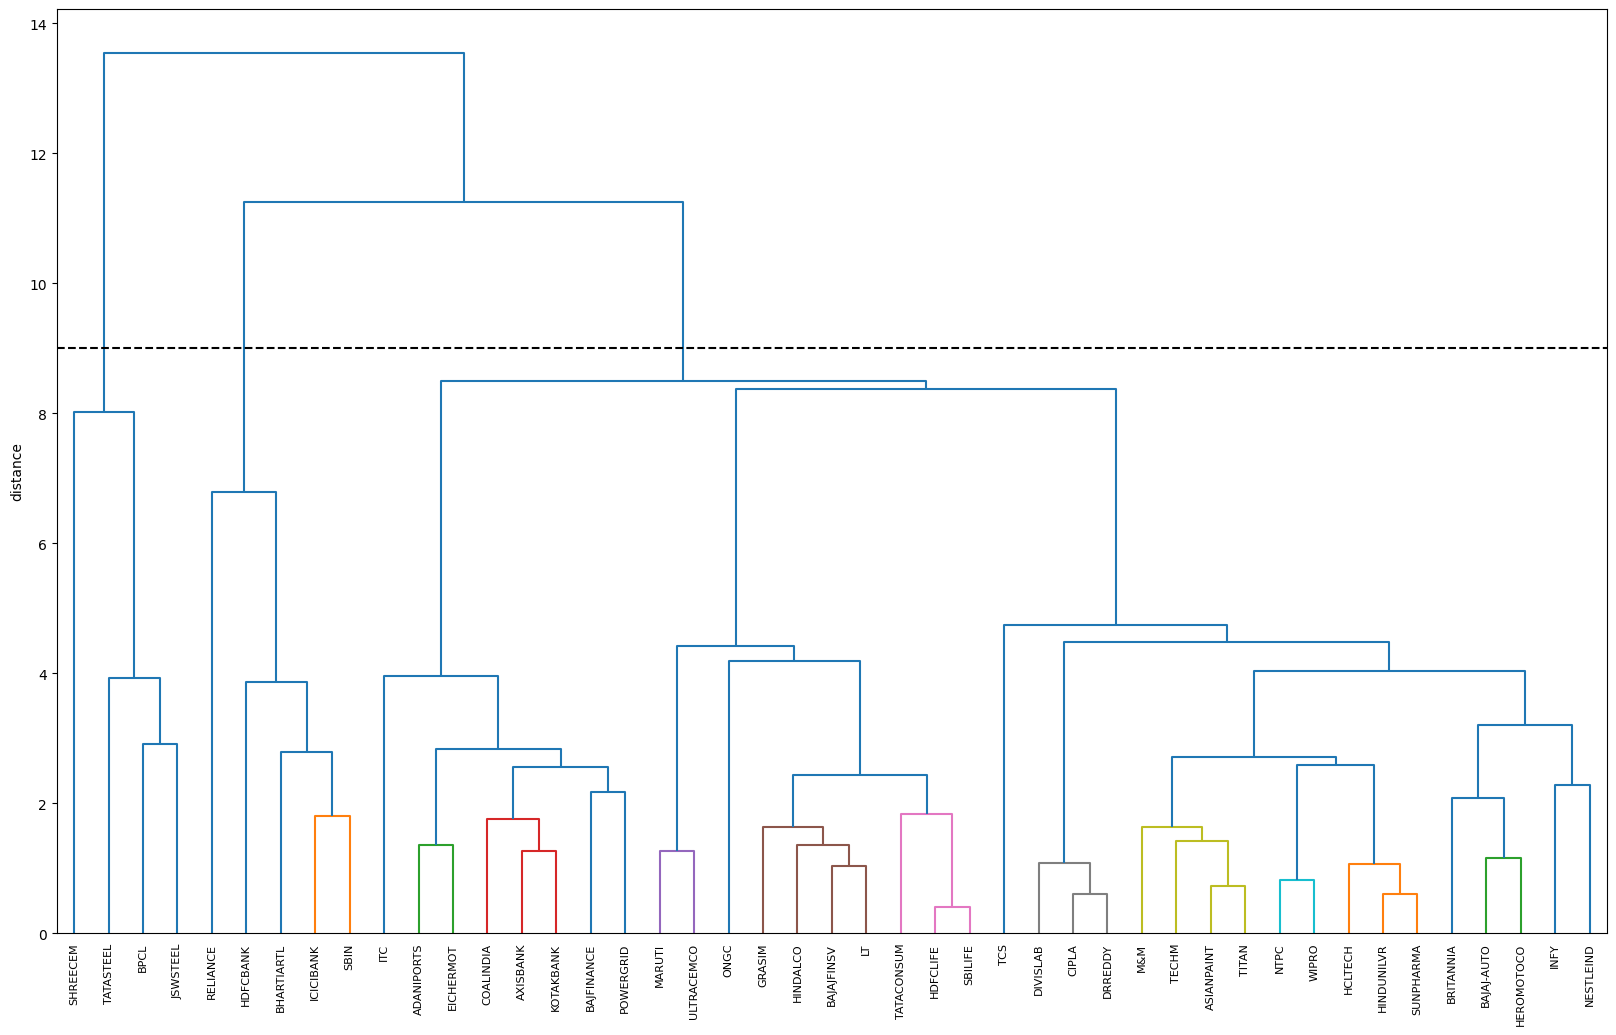

In [29]:
fig, ax = plt.subplots(figsize=(20, 12))
sch.dendrogram(Z, labels=scaled_df.index, ax=ax, color_threshold=2)
plt.xticks(rotation=90)
plt.axhline(y=9, color='k', linestyle='--')
ax.set_ylabel('distance')

#### **Performing Agglomerative Clustering with 5 clusters**

In [31]:
# import hierarchical clustering libraries
from sklearn.cluster import AgglomerativeClustering


# create clusters
hc_2020 = AgglomerativeClustering(n_clusters=5, metric = 'euclidean', linkage = 'ward')
y_pred = hc_2020.fit_predict(scaled_df)

In [32]:
y_pred

array([3, 1, 3, 1, 3, 4, 0, 2, 1, 1, 3, 1, 1, 3, 4, 1, 2, 4, 1, 4, 1, 2,
       3, 1, 0, 3, 4, 1, 4, 1, 1, 4, 3, 2, 4, 0, 2, 1, 1, 4, 0, 1, 1, 4,
       1])

In [33]:
viz_df = scaled_df
viz_df['Y_Predicted'] = y_pred

##### **Plotting the characteristics of the learned clusters**

In [ ]:
#Plot a line graph to see the characteristics of the clusters
scaled_df['label'] = pd.Series(y_pred, index=scaled_df.index)

clustered_df = scaled_df.groupby('label').mean()

labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']

plt.figure(figsize=(14,8))
plt.plot(clustered_df.T, label=labels)
plt.xticks(rotation=90)
plt.legend(labels)


##### **Looking at this, What characteristics do we find unique in each of these learned cluster?**

- **Cluster 1** - Companies with average market capital, quarterly growth, total revenue returning average returns

- **Cluster 2** - Companies havning largest market capital, with low quaterly growth (because they are already dominating), high total revenue, and highest return

- **Cluster 3** - Trader's favourites - high market volume with good profit margins.

- **Cluster 4** - Low market capital, with low quarterly growth, having high total revenue, with second largest returns

- **Cluster 5** - low market cap, with very high quarterly growth, but lowest total revenue and returns

This way, with the help of Hierarchical Clustering, we can draw conclusions on how different data points are grouped into different clusters, and also get information about the features of the dataset based on which the grouping is done.

***